<a href="https://colab.research.google.com/github/VijitSai/Genetic-Algorithms/blob/main/AI_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LINEAR REGRESSION CODE

In [ ]:
import numpy as np
from sklearn import linear_model, metrics, model_selection
import matplotlib.pyplot as plt


x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]   
noise = np.random.normal(0, 0.02, x_data.shape)   
y_data = np.square(x_data) + noise

# print(x_data)
#print(y_data)

In [ ]:
from sklearn.model_selection import train_test_split  

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
test_size = 0.2, random_state = 0)

In [ ]:
test_model = linear_model.LinearRegression()
test_model.fit(x_train,y_train)

LinearRegression()

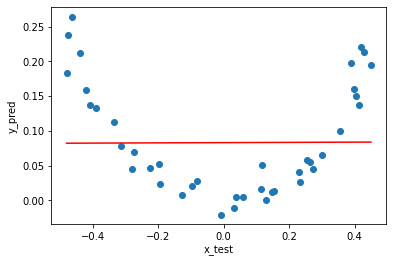

In [ ]:
y_pred = test_model.predict(x_test)

plt.scatter(x_test,y_test)
plt.xlabel('x_test')
plt.ylabel("y_pred")
plt.plot(x_test,y_pred,'red')

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred,y_test)

0.006124063012417707

##       POLYNOMIAL MODEL CODE



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn import linear_model, metrics, model_selection
import matplotlib.pyplot as plt


x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]   
noise = np.random.normal(0, 0.02, x_data.shape)   
y_data = np.square(x_data) + noise

# print(x_data)
#print(y_data)
# poly = PolynomialFeatures(degree=2, include_bias=False)


In [ ]:
from sklearn.model_selection import train_test_split
import operator

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
test_size = 0.2, random_state = 0)

S = sorted(zip(x_test,y_test), key=operator.itemgetter(0))
x_test, y_test = zip(*S)
# x_test

In [ ]:
x_test = np.asarray(x_test)

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features_train = poly.fit_transform(x_train.reshape(-1, 1))
poly_features_test = poly.fit_transform(x_test.reshape(-1, 1))

In [ ]:
from sklearn.linear_model import LinearRegression

poly_model = LinearRegression()
poly_model.fit(poly_features_train,y_train)


LinearRegression()

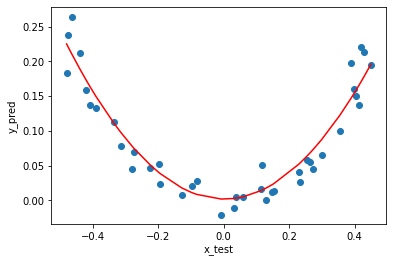

In [ ]:
y_pred = poly_model.predict(poly_features_test)

plt.scatter(x_test,y_test)
plt.xlabel("x_test")
plt.ylabel('y_pred')
plt.plot(x_test,y_pred,'r')

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred,y_test)

0.0005384167817411558

##          NEURAL NETWORK CODE

In [ ]:
import numpy as np
import tensorflow as tf
import keras

x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]   
noise = np.random.normal(0, 0.02, x_data.shape)   
y_data = np.square(x_data) + noise 

In [ ]:
from sklearn.model_selection import train_test_split 
 
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
test_size = 0.2, random_state = 0)

In [ ]:
from tensorflow import keras
from keras import layers
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()
x_train_scale = scale.fit_transform(x_train)
x_test_scale = scale.transform(x_test)

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(1))
model.add(layers.Dense(6,activation='relu',input_shape=x_train[0].shape))
model.add(layers.Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train_scale, y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
5/5 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 2/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 0.0044
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0027


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (32, 1)                   2         
                                                                 
 dense_19 (Dense)            (32, 6)                   12        
                                                                 
 dense_20 (Dense)            (32, 1)                   7         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = model.predict(x_test_scale)
# y_pred

2/2 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred,y_test)

0.0028628670051114636